In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')

In [4]:
from conlleval import evaluate

## Hebrew

In [5]:
corpus_path = r'tagged_corpus.txt'

In [6]:
conll = pd.read_csv('joint_with_orig_form.conll')

In [7]:
sents = []

def add_to_sents(g):
    sents.append(list(zip(g.sort_values('ID').WORD.tolist(),g.sort_values('ID').orig_form.tolist())))
    return 0
conll.groupby('sent').apply(add_to_sents)

sent
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
       ..
3453    0
3454    0
3455    0
3456    0
3457    0
3458    0
3459    0
3460    0
3461    0
3462    0
3463    0
3464    0
3465    0
3466    0
3467    0
3468    0
3469    0
3470    0
3471    0
3472    0
3473    0
3474    0
3475    0
3476    0
3477    0
3478    0
3479    0
3480    0
3481    0
3482    0
Length: 3482, dtype: int64

In [8]:
start_idx = 0
new_numbering = []
for sent in sents[1:]:
    for w, form in sent:
        new_numbering.append(w+start_idx)
    start_idx = w+start_idx
    
new_numbering[-5:]

[63068, 63069, 63069, 63070, 63071]

In [9]:
conll['word_global'] = new_numbering
conll.word_global.head(20)

0      1
1      2
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    17
19    17
Name: word_global, dtype: int64

In [10]:
tg = pd.read_csv(corpus_path, sep=' ', skiprows=1, names=['corpus_form', 'NER'], quoting=3).reset_index()
tg['index'] = tg['index']+1
tg.head(50)

,index,corpus_form,NER
0,1,נראה,O
1,2,שאביטל,I_PERS
2,3,אברג'יל,I_PERS
3,4,(,O
4,5,לשעבר,O
5,6,אוז,I_PERS
6,7,),O
7,8,",",O
8,9,אוהבת,O
9,10,לא,O


In [11]:
conll = conll.merge(tg, how='left', left_on='word_global', right_on='index')

In [12]:
conll.head()

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,...,head_form,head_upos,WORD,lat_idx_start,lat_idx_end,orig_form,word_global,index,corpus_form,NER
0,1,נראה,NaN,VB,VB,NaN,0,ROOT,_,_,...,NaN,NaN,1,0,1,נראה,1,1,נראה,O
1,2,ש,NaN,REL,REL,NaN,1,dep,_,_,...,נראה,VB,2,1,2,שאביטל,2,2,שאביטל,I_PERS
2,3,אביטל,NaN,NNP,NNP,NaN,0,ROOT,_,_,...,NaN,NaN,2,2,3,שאביטל,2,2,שאביטל,I_PERS
3,4,אברג'יל,NaN,NNP,NNP,NaN,3,complmn,_,_,...,אביטל,NNP,3,3,4,אברג'יל,3,3,אברג'יל,I_PERS
4,5,(,NaN,yyLRB,yyLRB,NaN,4,pcomp,_,_,...,אברג'יל,NNP,4,4,5,(,4,4,(,O


In [13]:
a = [1,2,3,4]
[2] + [1]*4

[2, 1, 1, 1, 1]

In [14]:
new_tags = []
def fix_bio(g):
    sz = g.shape[0]
    frst = g.NER.iat[0]
    if frst.startswith('B_'):
        tgs = [g.NER.iat[0]] + ['I_'+frst[2:]]*(sz-1)
    else:
        tgs = [frst]*sz
    new_tags.extend(tgs)

conll.groupby('word_global').apply(fix_bio)
            

""


In [15]:
conll['NER_fixed'] = new_tags[1:]

In [16]:
conll.head().T

,0,1,2,3,4
ID,1,2,3,4,5
FORM,נראה,ש,אביטל,אברג'יל,(
LEMMA,NaN,NaN,NaN,NaN,NaN
UPOS,VB,REL,NNP,NNP,yyLRB
XPOS,VB,REL,NNP,NNP,yyLRB
FEATS,NaN,NaN,NaN,NaN,NaN
HEAD,0,1,0,3,4
DEPREL,ROOT,dep,ROOT,complmn,pcomp
DEPS,_,_,_,_,_
MISC,_,_,_,_,_


In [17]:
x = conll

In [18]:
sents = x.groupby('sent')[['FORM', 'UPOS', 'NER_fixed']].apply(lambda x: x.values.tolist())
sents[:5]

sent
1    [[נראה, VB, O], [ש, REL, I_PERS], [אביטל, NNP,...
2    [[תורג'מן, NNP, I_PERS], [,, yyCM, O], [ש, REL...
3    [[הפגישה, VB, O], [ה, DEF, O], [מרגשת, JJ, O],...
4    [[ב, PREPOSITION, O], [ה, DEF, O], [שלב, NN, O...
5    [[אברג'יל, NNP, I_PERS], [,, yyCM, O], [נבוכה,...
dtype: object

In [19]:
words = list(set(x["FORM"].values))
n_words = len(words); n_words

12936

In [ ]:
tags = list(set(x["NER_fixed"].values))
n_tags = len(tags); n_tags

In [ ]:
max_len = 80
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [ ]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sents]

In [ ]:
X = pad_sequences(maxlen=max_len, sequences=X, value=word2idx["PAD"], padding='post', truncating='post')

In [ ]:
X[1]

In [ ]:
pos = list(set(x["UPOS"].values))
n_pos = len(pos); n_pos

In [ ]:
pos2idx = {w: i+1 for i, w in enumerate(pos)}
pos2idx["PAD"] = 0
X_pos = [[pos2idx[w[1]] for w in s] for s in sents]
X_pos = pad_sequences(maxlen=max_len, sequences=X_pos, value=pos2idx["PAD"], padding='post', truncating='post')
X_pos[0]

## True tags

In [ ]:
y = [[tag2idx[w[2]] for w in s] for s in sents]
y_numer = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

In [ ]:
y_numer[1]

In [ ]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags+1) for i in y_numer]
y[1]

## Perform train test splits

In [ ]:
from sklearn.model_selection import train_test_split

splits = [train_test_split(X, y, X_pos, test_size=0.15, random_state=42+i) for i in range(3)]

### Prep char input

In [ ]:
x.FORM.apply(len).hist(bins=18)

In [ ]:
max_len_char = 10

In [ ]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)

In [ ]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0

In [ ]:
X_char = []
for sentence in sents:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))

In [ ]:
splits_char = [train_test_split(X_char, y, test_size=0.15, random_state=42+i) for i in range(3)]

## Model building

In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Flatten, Concatenate
from keras.layers.merge import concatenate

In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Flatten, Concatenate
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping
from keras_contrib.layers import CRF
from keras_contrib.metrics import crf_accuracy
from keras_contrib.losses import crf_loss

In [39]:
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D

In [40]:
def plot_histories(histories, crf=False, **kwargs):
    for h in histories:
        plt.figure()
        if crf:
            plt.plot(h["crf_accuracy"])
            plt.plot(h["val_crf_accuracy"]) 
        else:   
            plt.plot(h["acc"])
            plt.plot(h["val_acc"])
        plt.show()
        
def predict_test_sentence(splits, models, words, i, use_word=True, use_pos=True, use_char=False, **kwargs):
    for split, model in zip(splits, models):
        if use_char:
            split, char_split = split
            X_char_tr, X_char_te, _, _ = char_split
        X_tr, X_te, y_tr, y_te, pos_tr, pos_te = split
        params = []
        if use_word:
            params.append(np.array([X_te[i]]))
        if use_pos:
            params.append(np.array([pos_te[i]]))
        if use_char:
            params.append(np.array([X_char_te[i]]))
        p = model.predict(params)
        p = np.argmax(p, axis=-1)
        t = np.argmax(y_te[i], axis=-1)
        print("{:15} ({:5}): {}".format("Word", "True", "Pred"))
        for w, pred, tr in zip(X_te[i], p[0], t):
            if idx2word[w]!="PAD":
                print("{:15} ({:5}): {}".format(idx2word[w], idx2tag[tr], idx2tag[pred]))
                
def predict_on_splits(splits, models, words, use_word=True, use_pos=False, use_char=False, predict_on_train=False, **kwargs):
    all_cat_preds = []
    all_cat_y_te = []
    all_words_flat = []
    for split, model in zip(splits, models):
        split, char_split = split
        X_char_tr, X_char_te, _, _ = char_split
        X_tr, X_te, y_tr, y_te, pos_tr, pos_te = split
        
        if predict_on_train:
            X_te, y_te, pos_te = X_tr, y_tr, pos_tr
        params = []
        if use_word:
            params.append(np.array(X_te))
        if use_pos:
            params.append(np.array(pos_te))
        if use_char:
            params.append(np.array(X_char_te))
        preds = model.predict(params)
        preds = np.argmax(preds, axis=-1)
        cat_preds = []
        cat_y_te = []
        words_flat = []
        y_te_num = np.argmax(y_te, axis=-1)
        for ws, s, t in zip(X_te, preds, y_te_num):
            for w, pred, tr in zip(ws, s, t):
                if idx2word[w]!="PAD":
                    words_flat.append(idx2word[w])
                    cat_preds.append(idx2tag[pred].replace('_', '-'))
                    cat_y_te.append(idx2tag[tr].replace('_', '-'))

        all_cat_preds.append(cat_preds)
        all_cat_y_te.append(cat_y_te)
        all_words_flat.append(words_flat)
        
    return (all_cat_preds, all_cat_y_te, all_words_flat)
    
def replace_pad_with_o(ll):
    new_ll = ['O' if label=='PAD' else label for label in ll]
    return new_ll

In [41]:
def create_model(words, chars, use_word=True, use_pos=False, embedding_matrix=None, 
                       embed_dim=70, trainable=True, input_dropout=False, stack_lstm=1,
                       epochs=100, early_stopping=True, patience=20, min_delta=0.0005,
                       use_char=False, crf=False,
                       stack_cross=False, stack_double=False, rec_dropout=0.1):

    X_tr, X_te, y_tr, y_te, pos_tr, pos_te = words
    X_char_tr, X_char_te, _, _ = chars
    all_input_embeds = []
    all_inputs = []
    train_data = []
    if use_word:
        input = Input(shape=(max_len,))
        if embedding_matrix is not None:
            input_embed = Embedding(input_dim=n_words+2, output_dim=embed_dim, input_length=max_len, 
                                weights=[embedding_matrix], trainable=trainable)(input)
        else:
            input_embed = Embedding(input_dim=n_words+2, output_dim=embed_dim, input_length=max_len)(input)
        all_input_embeds.append(input_embed)
        all_inputs.append(input)
        train_data.append(X_tr)
    if use_pos:
        pos_input = Input(shape=(max_len,))
        pos_embed = Embedding(input_dim=n_pos+1, output_dim=10, input_length=max_len)(pos_input)
        all_input_embeds.append(pos_embed)
        all_inputs.append(pos_input)
        train_data.append(pos_tr)
    if use_char:
        # input and embeddings for characters
        char_in = Input(shape=(max_len, max_len_char,))
        emb_char = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=20,
                                   input_length=max_len_char))(char_in)
        # character LSTM to get word encodings by characters
        char_enc = TimeDistributed(Bidirectional(LSTM(units=10, return_sequences=False,
                                        recurrent_dropout=0.5)))(emb_char)
        all_input_embeds.append(char_enc)
        all_inputs.append(char_in)
        train_data.append(np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char)))
    if len(all_inputs)>1:
        model = Concatenate()(all_input_embeds)
        if (use_char):
            model = SpatialDropout1D(0.3)(model)
    else: 
        model = all_input_embeds[0]
        all_input_embeds = all_input_embeds[0]
        all_inputs = all_inputs[0]
        train_data = train_data[0]

    if input_dropout:
        model = Dropout(0.1)(model)

    if stack_double:
        front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(model)
        front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(front)
        back = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(model)
        model = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(back)
    if stack_cross:
        front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(model)
        front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(front)
        back = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(model)
        back = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(back)
        model = concatenate([back, front])
    for i in range(stack_lstm):
        model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout))(model)

    if crf:
        model = TimeDistributed(Dense(50, activation="relu"))(model)  # a dense layer as suggested by neuralNer
        crf = CRF(n_tags+1)
        loss = crf_loss
        metric = crf_accuracy
        monitor = 'val_crf_accuracy'
        out = crf(model)
    else:
        out = TimeDistributed(Dense(n_tags+1, activation="softmax"))(model)  # softmax output layer
        loss = "categorical_crossentropy"
        metric = 'accuracy'
        monitor = 'val_acc'

    model = Model(all_inputs, out)
    model.compile(optimizer="rmsprop", loss=loss, metrics=[metric])
    if early_stopping:
        es = [EarlyStopping(monitor=monitor, mode='max', verbose=1, patience=patience, restore_best_weights=True, min_delta=min_delta)]
    else:
        es=None
    history = model.fit(train_data, np.array(y_tr), batch_size=32, epochs=epochs, 
                        validation_split=0.1, verbose=1, callbacks=es)
    hist = pd.DataFrame(history.history)
        
    return model, hist


In [42]:
results = []
configs = [
            {'use_pos': False },
            {'use_pos': True},
            {'crf': True,'use_pos': False  },
            {'crf': True,'use_pos': True },
          ]

Train on 2663 samples, validate on 296 samples
Epoch 1/100
2663/2663 [==============================] - 34s 13ms/step - loss: 0.4223 - acc: 0.9153 - val_loss: 0.2462 - val_acc: 0.9510
Epoch 2/100
2663/2663 [==============================] - 26s 10ms/step - loss: 0.2051 - acc: 0.9564 - val_loss: 0.2013 - val_acc: 0.9516
Epoch 3/100
2663/2663 [==============================] - 26s 10ms/step - loss: 0.1626 - acc: 0.9582 - val_loss: 0.1830 - val_acc: 0.9541
Epoch 4/100
2663/2663 [==============================] - 25s 9ms/step - loss: 0.1297 - acc: 0.9639 - val_loss: 0.1452 - val_acc: 0.9623
Epoch 5/100
2663/2663 [==============================] - 24s 9ms/step - loss: 0.1041 - acc: 0.9711 - val_loss: 0.1316 - val_acc: 0.9667
Epoch 6/100
2663/2663 [==============================] - 24s 9ms/step - loss: 0.0834 - acc: 0.9773 - val_loss: 0.1190 - val_acc: 0.9694
Epoch 7/100
2663/2663 [==============================] - 24s 9ms/step - loss: 0.0686 - acc: 0.9812 - val_loss: 0.1119 - val_acc: 0.972

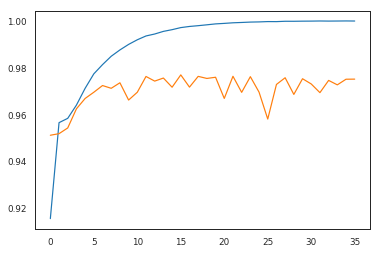

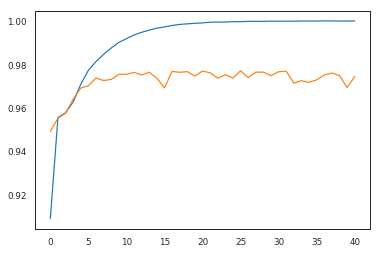

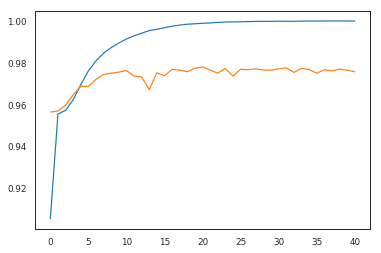

processed 12951 tokens with 774 phrases; found: 747 phrases; correct: 422.
accuracy:  65.32%; (non-O)
accuracy:  93.77%; precision:  56.49%; recall:  54.52%; FB1:  55.49
             DATE: precision:  55.56%; recall:  50.85%; FB1:  53.10  54
              LOC: precision:  63.41%; recall:  61.90%; FB1:  62.65  164
        MISC--AFF: precision:  66.29%; recall:  69.41%; FB1:  67.82  89
        MISC--ENT: precision:   5.00%; recall:  10.00%; FB1:   6.67  20
       MISC-EVENT: precision:  10.00%; recall:  20.00%; FB1:  13.33  10
            MONEY: precision:  61.29%; recall:  61.29%; FB1:  61.29  31
              ORG: precision:  43.21%; recall:  43.75%; FB1:  43.48  162
          PERCENT: precision:  55.56%; recall:  34.48%; FB1:  42.55  18
             PERS: precision:  64.32%; recall:  58.72%; FB1:  61.39  199
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
processed 12455 tokens with 778 phrases; found: 764 phrases; correct: 429.
accuracy:  66.12%; (non-O)
accura

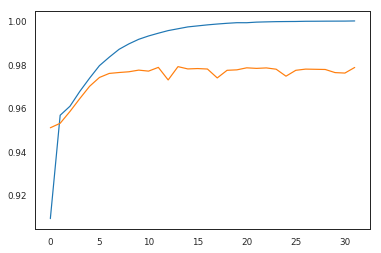

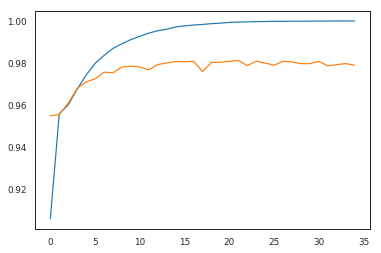

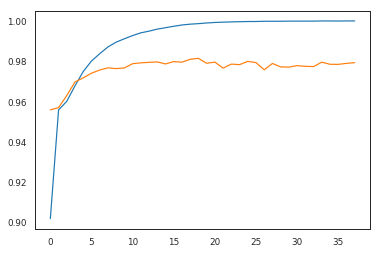

processed 12951 tokens with 774 phrases; found: 756 phrases; correct: 421.
accuracy:  65.38%; (non-O)
accuracy:  94.07%; precision:  55.69%; recall:  54.39%; FB1:  55.03
             DATE: precision:  49.21%; recall:  52.54%; FB1:  50.82  63
              LOC: precision:  62.16%; recall:  54.76%; FB1:  58.23  148
        MISC--AFF: precision:  73.75%; recall:  69.41%; FB1:  71.52  80
        MISC--ENT: precision:   7.14%; recall:  10.00%; FB1:   8.33  14
       MISC-EVENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  4
            MONEY: precision:  72.41%; recall:  67.74%; FB1:  70.00  29
              ORG: precision:  33.89%; recall:  38.12%; FB1:  35.88  180
          PERCENT: precision:  91.67%; recall:  75.86%; FB1:  83.02  24
             PERS: precision:  62.62%; recall:  61.47%; FB1:  62.04  214
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
processed 12455 tokens with 778 phrases; found: 848 phrases; correct: 452.
accuracy:  69.77%; (non-O)
accurac

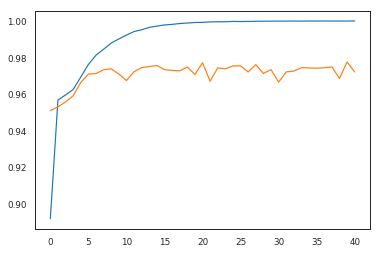

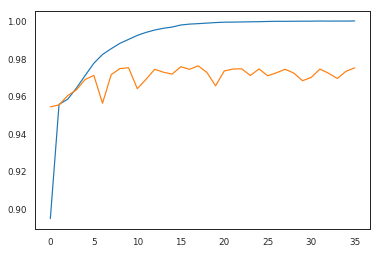

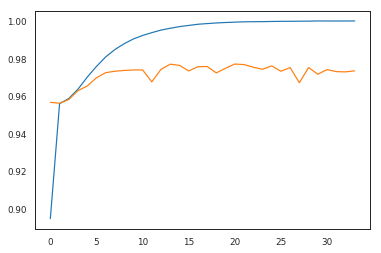

processed 12951 tokens with 774 phrases; found: 677 phrases; correct: 416.
accuracy:  63.38%; (non-O)
accuracy:  93.51%; precision:  61.45%; recall:  53.75%; FB1:  57.34
             DATE: precision:  54.90%; recall:  47.46%; FB1:  50.91  51
              LOC: precision:  63.58%; recall:  57.14%; FB1:  60.19  151
        MISC--AFF: precision:  82.67%; recall:  72.94%; FB1:  77.50  75
        MISC--ENT: precision:   9.09%; recall:  10.00%; FB1:   9.52  11
       MISC-EVENT: precision:  66.67%; recall:  40.00%; FB1:  50.00  3
            MONEY: precision:  68.75%; recall:  70.97%; FB1:  69.84  32
              ORG: precision:  48.53%; recall:  41.25%; FB1:  44.59  136
          PERCENT: precision:  81.25%; recall:  44.83%; FB1:  57.78  16
             PERS: precision:  63.64%; recall:  57.80%; FB1:  60.58  198
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  4
processed 12455 tokens with 778 phrases; found: 759 phrases; correct: 417.
accuracy:  65.02%; (non-O)
accurac

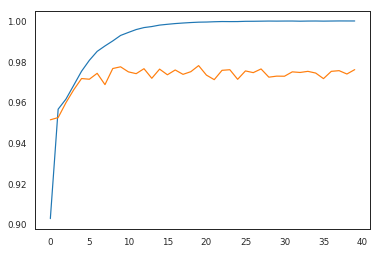

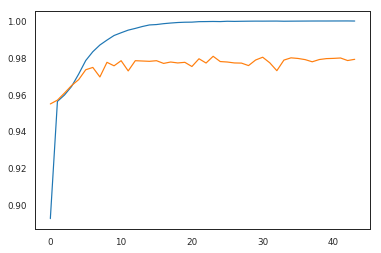

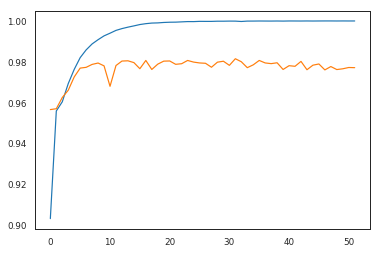

processed 12951 tokens with 774 phrases; found: 728 phrases; correct: 477.
accuracy:  69.13%; (non-O)
accuracy:  94.32%; precision:  65.52%; recall:  61.63%; FB1:  63.52
             DATE: precision:  64.18%; recall:  72.88%; FB1:  68.25  67
              LOC: precision:  67.92%; recall:  64.29%; FB1:  66.06  159
        MISC--AFF: precision:  78.31%; recall:  76.47%; FB1:  77.38  83
        MISC--ENT: precision:   6.67%; recall:  10.00%; FB1:   8.00  15
       MISC-EVENT: precision:  40.00%; recall:  80.00%; FB1:  53.33  10
            MONEY: precision:  69.70%; recall:  74.19%; FB1:  71.88  33
              ORG: precision:  51.45%; recall:  44.38%; FB1:  47.65  138
          PERCENT: precision:  84.62%; recall:  75.86%; FB1:  80.00  26
             PERS: precision:  72.54%; recall:  64.22%; FB1:  68.13  193
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  4
processed 12455 tokens with 778 phrases; found: 709 phrases; correct: 499.
accuracy:  68.68%; (non-O)
accura

In [39]:
for conf in configs:
    mh = [create_model(split, char, **conf) for split, char in zip(splits, splits_char)]
    hists = [h for m, h in mh]
    models = [m for m, h in mh]
    plot_histories(hists, **conf)
    all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, **conf)
    all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]
    res = []
    for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
        res.append(evaluate(cat_y_te, cat_preds))
    results.append(res)
    

In [44]:
res

[(65.52197802197803, 61.627906976744185, 63.515312916111846),
 (70.38081805359661, 64.1388174807198, 67.11499663752521),
 (63.45646437994723, 61.35204081632652, 62.38651102464332)]

In [50]:
list(zip(configs, results))

[({'use_pos': False},
  [(56.49263721552879, 54.52196382428941, 55.489809335963194),
   (56.15183246073299, 55.14138817480719, 55.642023346303496),
   (57.22543352601156, 50.51020408163265, 53.658536585365844)]),
 ({'use_pos': True},
  [(55.68783068783068, 54.39276485788114, 55.032679738562095),
   (53.301886792452834, 58.09768637532133, 55.59655596555966),
   (59.210526315789465, 57.39795918367348, 58.2901554404145)]),
 ({'crf': True, 'use_pos': False},
  [(61.44756277695716, 53.746770025839794, 57.339765678842184),
   (54.9407114624506, 53.59897172236504, 54.26154847104749),
   (56.43712574850299, 48.08673469387755, 51.92837465564738)]),
 ({'crf': True, 'use_pos': True},
  [(65.52197802197803, 61.627906976744185, 63.515312916111846),
   (70.38081805359661, 64.1388174807198, 67.11499663752521),
   (63.45646437994723, 61.35204081632652, 62.38651102464332)])]

In [43]:
!ls '../fasttext/'

wiki.he.vec


In [44]:
#load embeddings
print('loading word embeddings...')
embeddings_index = {}
with open('../fasttext/wiki.he.vec', encoding='utf-8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...
found 488937 word vectors


In [45]:
MAX_NB_WORDS = 100000
embed_dim = 300

In [46]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word2idx))
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word2idx.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word.strip('_'))
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 1265


In [48]:
print("sample words not found: ", np.random.choice(words_not_found, 10))

sample words not found:  ['ורובל-גולובקינה' "אנג'לס" '42' 'נסת' '92' "ינצ'י" '8%' 'ָטי' '1957-8'
 'אבטחות']


In [53]:
results2 = []
configs2 = [
            {'embed_dim': embed_dim, 'embedding_matrix': embedding_matrix, 'use_pos': False },
            {'embed_dim': embed_dim, 'embedding_matrix': embedding_matrix, 'use_pos': True},
            {'embed_dim': embed_dim, 'embedding_matrix': embedding_matrix, 'crf': True,'use_pos': False  },
            {'embed_dim': embed_dim, 'embedding_matrix': embedding_matrix, 'crf': True,'use_pos': True },
          ]

Train on 2663 samples, validate on 296 samples
Epoch 1/100
2663/2663 [==============================] - 43s 16ms/step - loss: 0.3288 - acc: 0.9416 - val_loss: 0.1461 - val_acc: 0.9598
Epoch 2/100
2663/2663 [==============================] - 24s 9ms/step - loss: 0.1014 - acc: 0.9719 - val_loss: 0.0890 - val_acc: 0.9745
Epoch 3/100
2663/2663 [==============================] - 25s 9ms/step - loss: 0.0651 - acc: 0.9808 - val_loss: 0.0713 - val_acc: 0.9793
Epoch 4/100
2663/2663 [==============================] - 24s 9ms/step - loss: 0.0469 - acc: 0.9859 - val_loss: 0.0667 - val_acc: 0.9815
Epoch 5/100
2663/2663 [==============================] - 24s 9ms/step - loss: 0.0357 - acc: 0.9893 - val_loss: 0.0568 - val_acc: 0.9829
Epoch 6/100
2663/2663 [==============================] - 24s 9ms/step - loss: 0.0264 - acc: 0.9923 - val_loss: 0.0549 - val_acc: 0.9832
Epoch 7/100
2663/2663 [==============================] - 25s 9ms/step - loss: 0.0195 - acc: 0.9941 - val_loss: 0.0555 - val_acc: 0.9835


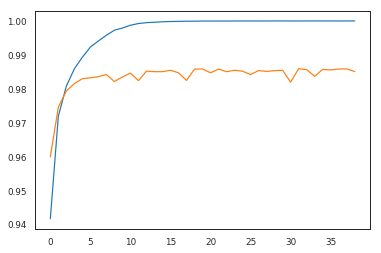

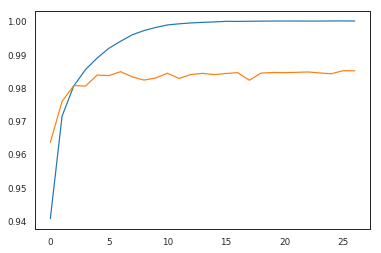

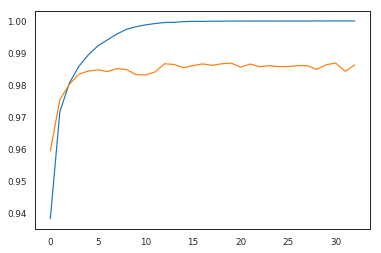

processed 12951 tokens with 774 phrases; found: 833 phrases; correct: 567.
accuracy:  79.75%; (non-O)
accuracy:  95.97%; precision:  68.07%; recall:  73.26%; FB1:  70.57
             DATE: precision:  64.41%; recall:  64.41%; FB1:  64.41  59
              LOC: precision:  65.98%; recall:  76.19%; FB1:  70.72  194
        MISC--AFF: precision:  89.66%; recall:  91.76%; FB1:  90.70  87
        MISC--ENT: precision:  40.00%; recall:  40.00%; FB1:  40.00  10
       MISC-EVENT: precision:  44.44%; recall:  80.00%; FB1:  57.14  9
            MONEY: precision:  84.85%; recall:  90.32%; FB1:  87.50  33
              ORG: precision:  50.83%; recall:  57.50%; FB1:  53.96  181
          PERCENT: precision:  79.31%; recall:  79.31%; FB1:  79.31  29
             PERS: precision:  76.00%; recall:  78.44%; FB1:  77.20  225
             TIME: precision:  16.67%; recall:  11.11%; FB1:  13.33  6
processed 12455 tokens with 778 phrases; found: 810 phrases; correct: 520.
accuracy:  76.54%; (non-O)
accurac

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2663/2663 [==============================] - 24s 9ms/step - loss: 6.1475e-07 - acc: 1.0000 - val_loss: 0.1089 - val_acc: 0.9866
Epoch 43/100
2663/2663 [==============================] - 24s 9ms/step - loss: 1.6207e-06 - acc: 1.0000 - val_loss: 0.1049 - val_acc: 0.9864
Epoch 44/100
2663/2663 [==============================] - 24s 9ms/step - loss: 5.5237e-07 - acc: 1.0000 - val_loss: 0.1098 - val_acc: 0.9861
Epoch 45/100
2663/2663 [==============================] - 24s 9ms/step - loss: 4.1611e-07 - acc: 1.0000 - val_loss: 0.1086 - val_acc: 0.9864
Epoch 46/100
2663/2663 [==============================] - 25s 9ms/step - loss: 3.6510e-07 - acc: 1.0000 - val_loss: 0.1105 - val_acc: 0.9860
Epoch 47/100
2663/2663 [==============================] - 24s 9ms/step - loss: 3.5875e-07 - acc: 1.0000 - val_loss: 0.1090 - val_acc: 0.9870
Restoring model weights from the end of the best epoch
Epoch 00047: early stopping
Train on 2663 samples, validate on 296 samples
Epoch 1/100
2663/2663 [==============

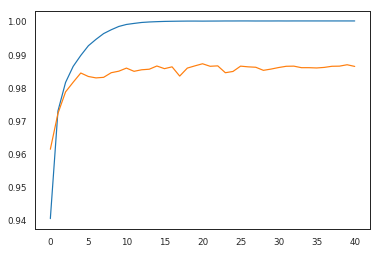

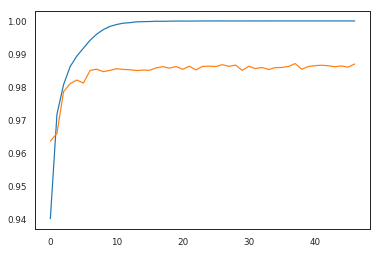

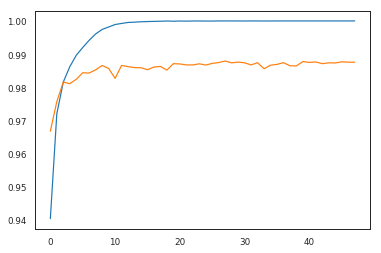

processed 12951 tokens with 774 phrases; found: 830 phrases; correct: 574.
accuracy:  79.23%; (non-O)
accuracy:  96.10%; precision:  69.16%; recall:  74.16%; FB1:  71.57
             DATE: precision:  68.97%; recall:  67.80%; FB1:  68.38  58
              LOC: precision:  71.75%; recall:  75.60%; FB1:  73.62  177
        MISC--AFF: precision:  82.11%; recall:  91.76%; FB1:  86.67  95
        MISC--ENT: precision:  30.00%; recall:  30.00%; FB1:  30.00  10
       MISC-EVENT: precision:  33.33%; recall:  60.00%; FB1:  42.86  9
            MONEY: precision:  84.85%; recall:  90.32%; FB1:  87.50  33
              ORG: precision:  53.57%; recall:  56.25%; FB1:  54.88  168
          PERCENT: precision:  93.33%; recall:  96.55%; FB1:  94.92  30
             PERS: precision:  71.26%; recall:  80.73%; FB1:  75.70  247
             TIME: precision:  33.33%; recall:  11.11%; FB1:  16.67  3
processed 12455 tokens with 778 phrases; found: 806 phrases; correct: 578.
accuracy:  78.92%; (non-O)
accurac

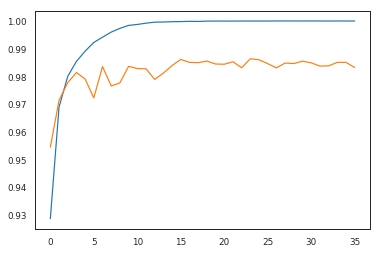

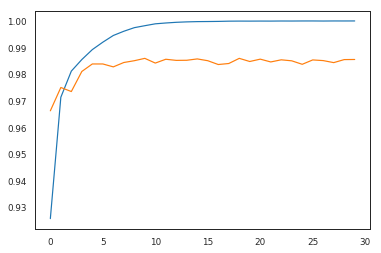

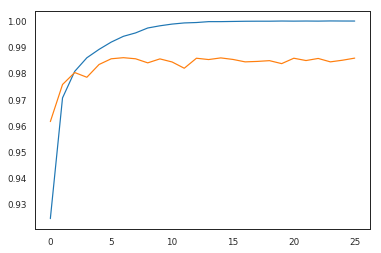

processed 12951 tokens with 774 phrases; found: 783 phrases; correct: 564.
accuracy:  79.52%; (non-O)
accuracy:  96.07%; precision:  72.03%; recall:  72.87%; FB1:  72.45
             DATE: precision:  63.08%; recall:  69.49%; FB1:  66.13  65
              LOC: precision:  74.56%; recall:  75.00%; FB1:  74.78  169
        MISC--AFF: precision:  88.37%; recall:  89.41%; FB1:  88.89  86
        MISC--ENT: precision:  41.67%; recall:  50.00%; FB1:  45.45  12
       MISC-EVENT: precision:  50.00%; recall:  80.00%; FB1:  61.54  8
            MONEY: precision:  87.10%; recall:  87.10%; FB1:  87.10  31
              ORG: precision:  56.33%; recall:  55.62%; FB1:  55.97  158
          PERCENT: precision:  88.89%; recall:  82.76%; FB1:  85.71  27
             PERS: precision:  77.03%; recall:  78.44%; FB1:  77.73  222
             TIME: precision:  20.00%; recall:  11.11%; FB1:  14.29  5
processed 12455 tokens with 778 phrases; found: 762 phrases; correct: 554.
accuracy:  77.70%; (non-O)
accurac

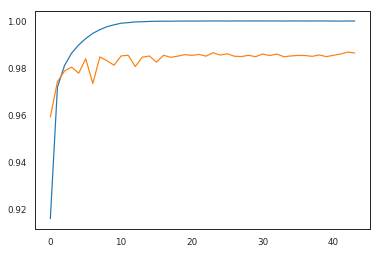

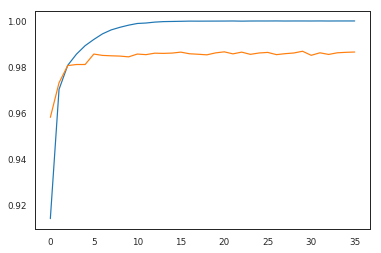

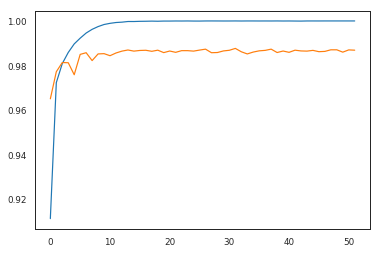

processed 12951 tokens with 774 phrases; found: 808 phrases; correct: 602.
accuracy:  81.57%; (non-O)
accuracy:  96.26%; precision:  74.50%; recall:  77.78%; FB1:  76.11
             DATE: precision:  69.49%; recall:  69.49%; FB1:  69.49  59
              LOC: precision:  77.40%; recall:  81.55%; FB1:  79.42  177
        MISC--AFF: precision:  88.76%; recall:  92.94%; FB1:  90.80  89
        MISC--ENT: precision:  26.32%; recall:  50.00%; FB1:  34.48  19
       MISC-EVENT: precision:  75.00%; recall:  60.00%; FB1:  66.67  4
            MONEY: precision:  84.38%; recall:  87.10%; FB1:  85.71  32
              ORG: precision:  59.04%; recall:  61.25%; FB1:  60.12  166
          PERCENT: precision: 100.00%; recall:  93.10%; FB1:  96.43  27
             PERS: precision:  78.79%; recall:  83.49%; FB1:  81.07  231
             TIME: precision:  75.00%; recall:  33.33%; FB1:  46.15  4
processed 12455 tokens with 778 phrases; found: 802 phrases; correct: 599.
accuracy:  80.44%; (non-O)
accurac

In [62]:
for conf in configs2:
    mh = [create_model(split, char, **conf) for split, char in zip(splits, splits_char)]
    hists = [h for m, h in mh]
    models = [m for m, h in mh]
    plot_histories(hists, **conf)
    all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, **conf)
    all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]
    res = []
    for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
        res.append(evaluate(cat_y_te, cat_preds))
    results2.append(res)
    

In [89]:
results3 = []

In [54]:
configs3 = [
            #{'use_char': True, 'use_word': False, 'use_pos': False },
            #{'use_char': True, 'use_word': False, 'use_pos': True},
            {'use_char': True, 'use_pos': False },
            {'use_char': True, 'use_pos': True},
            {'use_char': True, 'use_pos': False, 'embedding_matrix': embedding_matrix, 'trainable': False, 'embed_dim': embed_dim},
          ]

In [ ]:
for conf in configs3:
    print (conf)
    mh = [create_model(split, char, **conf) for split, char in zip(splits, splits_char)]
    hists = [h for m, h in mh]
    models = [m for m, h in mh]
    plot_histories(hists, **conf)
    all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, **conf)
    all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]
    res = []
    for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
        res.append(evaluate(cat_y_te, cat_preds))
    results3.append(res)
    

{'use_char': True, 'use_pos': False}
Train on 2663 samples, validate on 296 samples
Epoch 1/100
2663/2663 [==============================] - 63s 24ms/step - loss: 0.4275 - acc: 0.9065 - val_loss: 0.2467 - val_acc: 0.9505
Epoch 2/100
2663/2663 [==============================] - 27s 10ms/step - loss: 0.2069 - acc: 0.9561 - val_loss: 0.2087 - val_acc: 0.9518
Epoch 3/100
2663/2663 [==============================] - 28s 10ms/step - loss: 0.1728 - acc: 0.9575 - val_loss: 0.1775 - val_acc: 0.9552
Epoch 4/100
2663/2663 [==============================] - 28s 10ms/step - loss: 0.1442 - acc: 0.9613 - val_loss: 0.1619 - val_acc: 0.9575
Epoch 5/100
2663/2663 [==============================] - 28s 10ms/step - loss: 0.1199 - acc: 0.9663 - val_loss: 0.1311 - val_acc: 0.9658
Epoch 6/100
2663/2663 [==============================] - 28s 10ms/step - loss: 0.0991 - acc: 0.9724 - val_loss: 0.1222 - val_acc: 0.9683
Epoch 7/100
2663/2663 [==============================] - 28s 10ms/step - loss: 0.0823 - acc: 0

In [91]:
results3

[[(60.50420168067227, 65.11627906976744, 62.72557560672061),
  (55.55555555555556, 58.48329048843187, 56.98184095178459),
  (53.84615384615385, 52.67857142857143, 53.25596389426177)],
 [(64.43883984867591, 66.02067183462532, 65.22016592214422),
  (64.23927178153446, 63.49614395886889, 63.86554621848739),
  (65.41049798115746, 61.98979591836735, 63.65422396856582)],
 [(72.40932642487047, 72.22222222222221, 72.3156532988357),
  (70.25641025641025, 70.4370179948586, 70.34659820282413),
  (70.88607594936708, 71.42857142857143, 71.15628970775096)]]

In [94]:
for c in configs3:
    if 'embedding_matrix' in c:
        c.update({'embedding_matrix': 'fastext'}) 

In [95]:
list(zip(configs3, results3))

[({'use_char': True, 'use_pos': False},
  [(60.50420168067227, 65.11627906976744, 62.72557560672061),
   (55.55555555555556, 58.48329048843187, 56.98184095178459),
   (53.84615384615385, 52.67857142857143, 53.25596389426177)]),
 ({'use_char': True, 'use_pos': True},
  [(64.43883984867591, 66.02067183462532, 65.22016592214422),
   (64.23927178153446, 63.49614395886889, 63.86554621848739),
   (65.41049798115746, 61.98979591836735, 63.65422396856582)]),
 ({'use_char': True,
   'use_pos': False,
   'embedding_matrix': 'fastext',
   'trainable': False,
   'embed_dim': 300},
  [(72.40932642487047, 72.22222222222221, 72.3156532988357),
   (70.25641025641025, 70.4370179948586, 70.34659820282413),
   (70.88607594936708, 71.42857142857143, 71.15628970775096)])]

In [42]:
results4 = []

In [55]:
configs4 = [            
            {'use_char': True, 'use_pos': False, 'embedding_matrix': embedding_matrix, 'trainable': True, 'embed_dim': embed_dim},
            {'use_char': True, 'use_pos': True, 'embedding_matrix': embedding_matrix, 'trainable': False, 'embed_dim': embed_dim},
            {'use_char': True, 'use_pos': True, 'embedding_matrix': embedding_matrix, 'trainable': True, 'embed_dim': embed_dim},
            {'use_char': True, 'crf': True, 'use_pos': False},
            {'use_char': True, 'crf': True, 'use_pos': True},
            {'use_char': True, 'crf': True, 'use_pos': False, 'embedding_matrix': embedding_matrix, 'trainable': False, 'embed_dim': embed_dim},
            {'use_char': True, 'crf': True, 'use_pos': False, 'embedding_matrix': embedding_matrix, 'trainable': True, 'embed_dim': embed_dim},
            {'use_char': True, 'crf': True, 'use_pos': True, 'embedding_matrix': embedding_matrix, 'trainable': False, 'embed_dim': embed_dim},
            {'use_char': True, 'crf': True, 'use_pos': True, 'embedding_matrix': embedding_matrix, 'trainable': True, 'embed_dim': embed_dim},
]

Train on 2663 samples, validate on 296 samples
Epoch 1/100
2663/2663 [==============================] - 34s 13ms/step - loss: 0.3180 - acc: 0.9417 - val_loss: 0.1511 - val_acc: 0.9589
Epoch 2/100
2663/2663 [==============================] - 32s 12ms/step - loss: 0.1122 - acc: 0.9693 - val_loss: 0.0985 - val_acc: 0.9712
Epoch 3/100
2663/2663 [==============================] - 31s 12ms/step - loss: 0.0782 - acc: 0.9771 - val_loss: 0.1012 - val_acc: 0.9707
Epoch 4/100
2663/2663 [==============================] - 31s 12ms/step - loss: 0.0611 - acc: 0.9817 - val_loss: 0.0661 - val_acc: 0.9801
Epoch 5/100
2663/2663 [==============================] - 30s 11ms/step - loss: 0.0498 - acc: 0.9850 - val_loss: 0.0749 - val_acc: 0.9788
Epoch 6/100
2663/2663 [==============================] - 29s 11ms/step - loss: 0.0421 - acc: 0.9871 - val_loss: 0.0580 - val_acc: 0.9822
Epoch 7/100
2663/2663 [==============================] - 30s 11ms/step - loss: 0.0351 - acc: 0.9892 - val_loss: 0.0550 - val_acc: 0

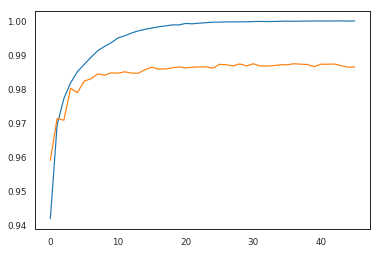

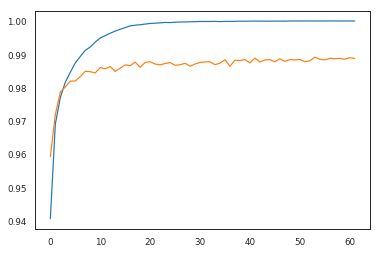

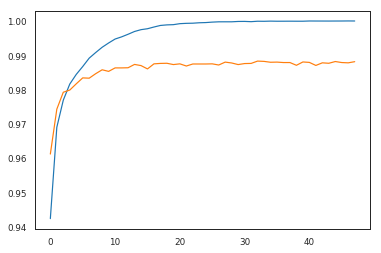

processed 12951 tokens with 774 phrases; found: 812 phrases; correct: 587.
accuracy:  80.81%; (non-O)
accuracy:  96.42%; precision:  72.29%; recall:  75.84%; FB1:  74.02
             DATE: precision:  68.57%; recall:  81.36%; FB1:  74.42  70
              LOC: precision:  72.41%; recall:  75.00%; FB1:  73.68  174
        MISC--AFF: precision:  91.86%; recall:  92.94%; FB1:  92.40  86
        MISC--ENT: precision:  33.33%; recall:  60.00%; FB1:  42.86  18
       MISC-EVENT: precision:  37.50%; recall:  60.00%; FB1:  46.15  8
            MONEY: precision:  87.50%; recall:  90.32%; FB1:  88.89  32
              ORG: precision:  58.93%; recall:  61.88%; FB1:  60.37  168
          PERCENT: precision: 100.00%; recall:  86.21%; FB1:  92.59  25
             PERS: precision:  75.33%; recall:  78.44%; FB1:  76.85  227
             TIME: precision:  50.00%; recall:  22.22%; FB1:  30.77  4
processed 12455 tokens with 778 phrases; found: 812 phrases; correct: 608.
accuracy:  81.05%; (non-O)
accurac

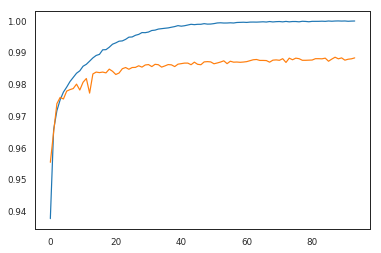

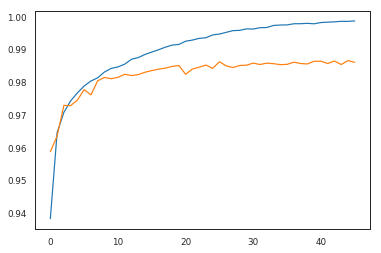

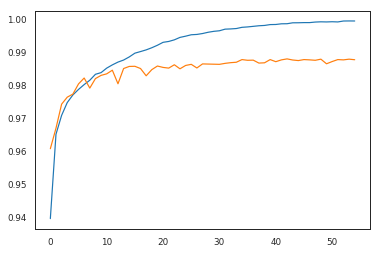

processed 12951 tokens with 774 phrases; found: 794 phrases; correct: 592.
accuracy:  79.69%; (non-O)
accuracy:  96.42%; precision:  74.56%; recall:  76.49%; FB1:  75.51
             DATE: precision:  70.97%; recall:  74.58%; FB1:  72.73  62
              LOC: precision:  73.14%; recall:  76.19%; FB1:  74.64  175
        MISC--AFF: precision:  86.96%; recall:  94.12%; FB1:  90.40  92
        MISC--ENT: precision:  62.50%; recall:  50.00%; FB1:  55.56  8
       MISC-EVENT: precision:  44.44%; recall:  80.00%; FB1:  57.14  9
            MONEY: precision:  90.62%; recall:  93.55%; FB1:  92.06  32
              ORG: precision:  60.49%; recall:  61.25%; FB1:  60.87  162
          PERCENT: precision:  93.55%; recall: 100.00%; FB1:  96.67  31
             PERS: precision:  79.36%; recall:  79.36%; FB1:  79.36  218
             TIME: precision:  40.00%; recall:  22.22%; FB1:  28.57  5
processed 12455 tokens with 778 phrases; found: 839 phrases; correct: 565.
accuracy:  79.40%; (non-O)
accuracy

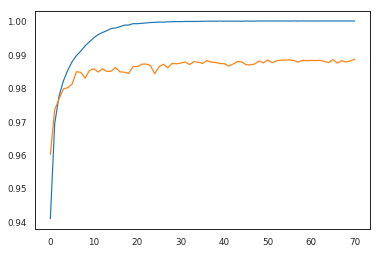

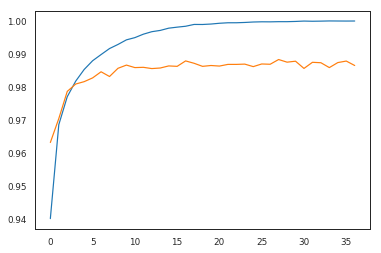

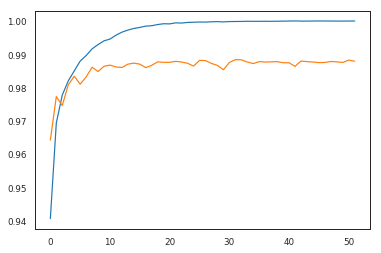

processed 12951 tokens with 774 phrases; found: 820 phrases; correct: 614.
accuracy:  83.04%; (non-O)
accuracy:  96.72%; precision:  74.88%; recall:  79.33%; FB1:  77.04
             DATE: precision:  81.67%; recall:  83.05%; FB1:  82.35  60
              LOC: precision:  72.87%; recall:  81.55%; FB1:  76.97  188
        MISC--AFF: precision:  90.70%; recall:  91.76%; FB1:  91.23  86
        MISC--ENT: precision:  31.25%; recall:  50.00%; FB1:  38.46  16
       MISC-EVENT: precision:  50.00%; recall:  60.00%; FB1:  54.55  6
            MONEY: precision:  90.32%; recall:  90.32%; FB1:  90.32  31
              ORG: precision:  61.99%; recall:  66.25%; FB1:  64.05  171
          PERCENT: precision:  96.67%; recall: 100.00%; FB1:  98.31  30
             PERS: precision:  78.32%; recall:  81.19%; FB1:  79.73  226
             TIME: precision:  33.33%; recall:  22.22%; FB1:  26.67  6
processed 12455 tokens with 778 phrases; found: 808 phrases; correct: 587.
accuracy:  81.29%; (non-O)
accurac

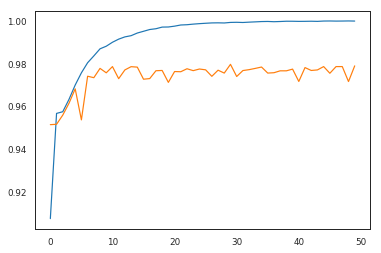

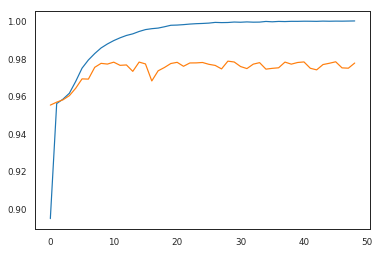

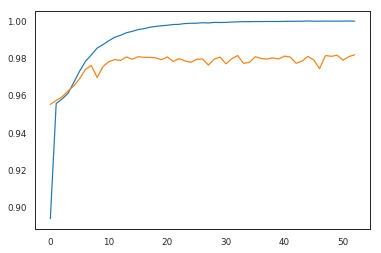

processed 12951 tokens with 774 phrases; found: 745 phrases; correct: 498.
accuracy:  70.13%; (non-O)
accuracy:  94.35%; precision:  66.85%; recall:  64.34%; FB1:  65.57
             DATE: precision:  69.39%; recall:  57.63%; FB1:  62.96  49
              LOC: precision:  63.91%; recall:  64.29%; FB1:  64.09  169
        MISC--AFF: precision:  76.67%; recall:  81.18%; FB1:  78.86  90
        MISC--ENT: precision:  17.39%; recall:  40.00%; FB1:  24.24  23
       MISC-EVENT: precision:  66.67%; recall:  80.00%; FB1:  72.73  6
            MONEY: precision:  87.10%; recall:  87.10%; FB1:  87.10  31
              ORG: precision:  60.84%; recall:  54.37%; FB1:  57.43  143
          PERCENT: precision:  91.30%; recall:  72.41%; FB1:  80.77  23
             PERS: precision:  69.42%; recall:  65.60%; FB1:  67.45  206
             TIME: precision:  20.00%; recall:  11.11%; FB1:  14.29  5
processed 12455 tokens with 778 phrases; found: 694 phrases; correct: 496.
accuracy:  66.67%; (non-O)
accurac

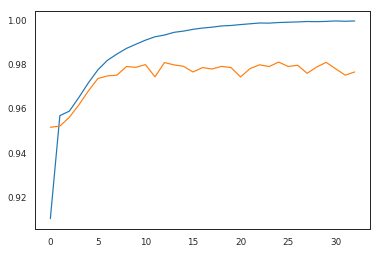

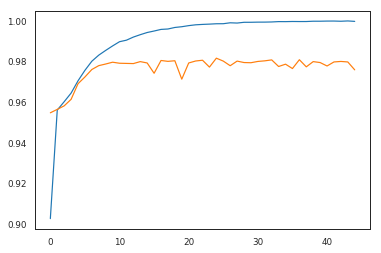

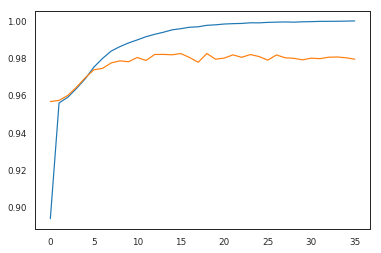

processed 12951 tokens with 774 phrases; found: 700 phrases; correct: 480.
accuracy:  68.49%; (non-O)
accuracy:  94.73%; precision:  68.57%; recall:  62.02%; FB1:  65.13
             DATE: precision:  62.07%; recall:  61.02%; FB1:  61.54  58
              LOC: precision:  65.06%; recall:  64.29%; FB1:  64.67  166
        MISC--AFF: precision:  85.33%; recall:  75.29%; FB1:  80.00  75
        MISC--ENT: precision:  10.00%; recall:  10.00%; FB1:  10.00  10
       MISC-EVENT: precision:  33.33%; recall:  40.00%; FB1:  36.36  6
            MONEY: precision:  90.00%; recall:  87.10%; FB1:  88.52  30
              ORG: precision:  58.47%; recall:  43.12%; FB1:  49.64  118
          PERCENT: precision: 100.00%; recall:  86.21%; FB1:  92.59  25
             PERS: precision:  70.14%; recall:  67.89%; FB1:  69.00  211
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  1
processed 12455 tokens with 778 phrases; found: 742 phrases; correct: 533.
accuracy:  72.33%; (non-O)
accurac

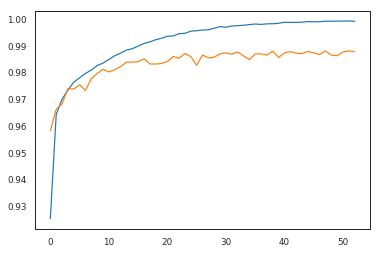

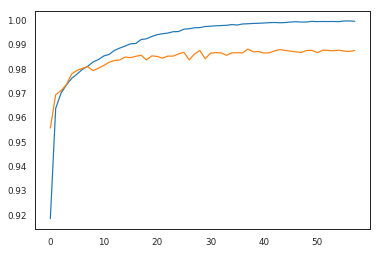

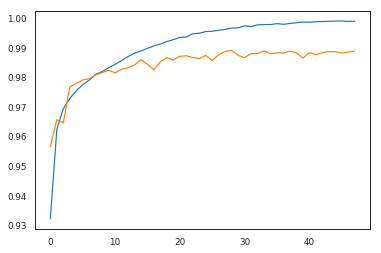

processed 12951 tokens with 774 phrases; found: 735 phrases; correct: 580.
accuracy:  78.76%; (non-O)
accuracy:  96.28%; precision:  78.91%; recall:  74.94%; FB1:  76.87
             DATE: precision:  82.69%; recall:  72.88%; FB1:  77.48  52
              LOC: precision:  79.38%; recall:  75.60%; FB1:  77.44  160
        MISC--AFF: precision:  87.91%; recall:  94.12%; FB1:  90.91  91
        MISC--ENT: precision:  75.00%; recall:  30.00%; FB1:  42.86  4
       MISC-EVENT: precision:  66.67%; recall:  80.00%; FB1:  72.73  6
            MONEY: precision:  85.29%; recall:  93.55%; FB1:  89.23  34
              ORG: precision:  75.00%; recall:  52.50%; FB1:  61.76  112
          PERCENT: precision:  96.67%; recall: 100.00%; FB1:  98.31  30
             PERS: precision:  74.07%; recall:  82.57%; FB1:  78.09  243
             TIME: precision:  33.33%; recall:  11.11%; FB1:  16.67  3
processed 12455 tokens with 778 phrases; found: 780 phrases; correct: 597.
accuracy:  81.66%; (non-O)
accuracy

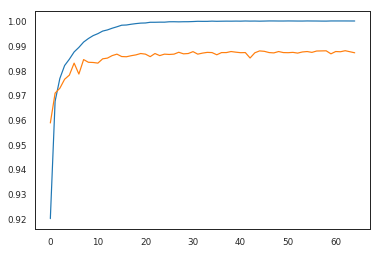

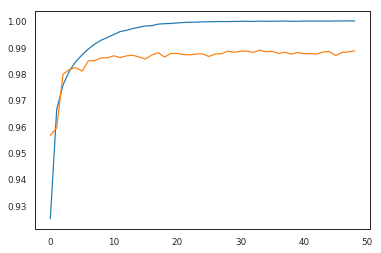

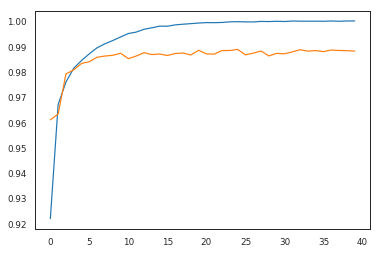

processed 12951 tokens with 774 phrases; found: 765 phrases; correct: 608.
accuracy:  82.34%; (non-O)
accuracy:  96.64%; precision:  79.48%; recall:  78.55%; FB1:  79.01
             DATE: precision:  79.31%; recall:  77.97%; FB1:  78.63  58
              LOC: precision:  79.65%; recall:  81.55%; FB1:  80.59  172
        MISC--AFF: precision:  94.05%; recall:  92.94%; FB1:  93.49  84
        MISC--ENT: precision:  41.67%; recall:  50.00%; FB1:  45.45  12
       MISC-EVENT: precision:  36.36%; recall:  80.00%; FB1:  50.00  11
            MONEY: precision:  87.10%; recall:  87.10%; FB1:  87.10  31
              ORG: precision:  68.83%; recall:  66.25%; FB1:  67.52  154
          PERCENT: precision:  92.00%; recall:  79.31%; FB1:  85.19  25
             PERS: precision:  83.96%; recall:  81.65%; FB1:  82.79  212
             TIME: precision:  50.00%; recall:  33.33%; FB1:  40.00  6
processed 12455 tokens with 778 phrases; found: 776 phrases; correct: 613.
accuracy:  81.66%; (non-O)
accura

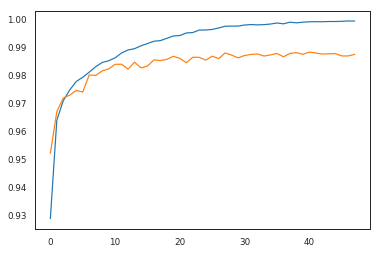

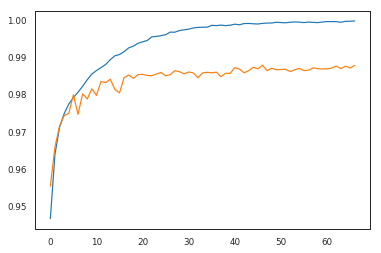

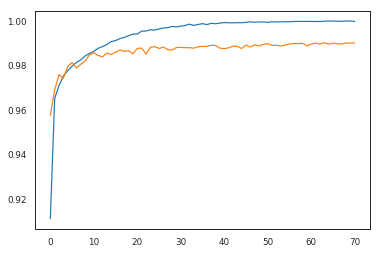

processed 12951 tokens with 774 phrases; found: 759 phrases; correct: 597.
accuracy:  81.57%; (non-O)
accuracy:  96.58%; precision:  78.66%; recall:  77.13%; FB1:  77.89
             DATE: precision:  73.68%; recall:  71.19%; FB1:  72.41  57
              LOC: precision:  78.57%; recall:  78.57%; FB1:  78.57  168
        MISC--AFF: precision:  92.86%; recall:  91.76%; FB1:  92.31  84
        MISC--ENT: precision:  60.00%; recall:  60.00%; FB1:  60.00  10
       MISC-EVENT: precision:  50.00%; recall:  80.00%; FB1:  61.54  8
            MONEY: precision:  87.88%; recall:  93.55%; FB1:  90.62  33
              ORG: precision:  67.12%; recall:  61.25%; FB1:  64.05  146
          PERCENT: precision:  90.32%; recall:  96.55%; FB1:  93.33  31
             PERS: precision:  82.33%; recall:  81.19%; FB1:  81.76  215
             TIME: precision:  42.86%; recall:  33.33%; FB1:  37.50  7
processed 12455 tokens with 778 phrases; found: 773 phrases; correct: 620.
accuracy:  81.78%; (non-O)
accurac

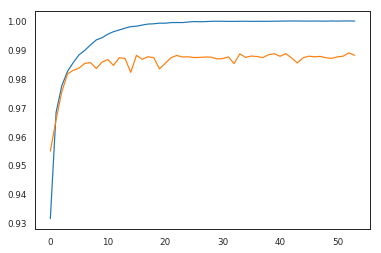

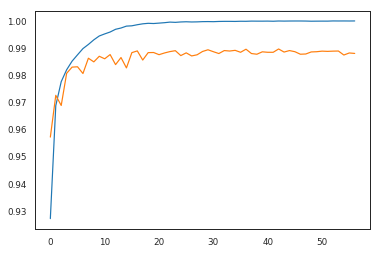

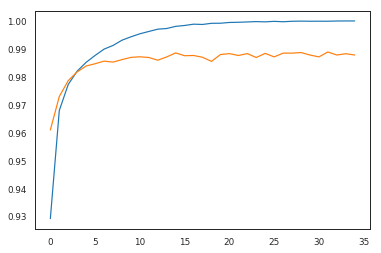

processed 12951 tokens with 774 phrases; found: 787 phrases; correct: 630.
accuracy:  83.86%; (non-O)
accuracy:  96.73%; precision:  80.05%; recall:  81.40%; FB1:  80.72
             DATE: precision:  85.19%; recall:  77.97%; FB1:  81.42  54
              LOC: precision:  80.57%; recall:  83.93%; FB1:  82.22  175
        MISC--AFF: precision:  94.19%; recall:  95.29%; FB1:  94.74  86
        MISC--ENT: precision:  42.86%; recall:  60.00%; FB1:  50.00  14
       MISC-EVENT: precision:  75.00%; recall:  60.00%; FB1:  66.67  4
            MONEY: precision:  84.38%; recall:  87.10%; FB1:  85.71  32
              ORG: precision:  66.27%; recall:  70.00%; FB1:  68.09  169
          PERCENT: precision:  93.55%; recall: 100.00%; FB1:  96.67  31
             PERS: precision:  83.11%; recall:  83.49%; FB1:  83.30  219
             TIME: precision: 100.00%; recall:  33.33%; FB1:  50.00  3
processed 12455 tokens with 778 phrases; found: 770 phrases; correct: 613.
accuracy:  81.90%; (non-O)
accurac

In [51]:
for conf in configs4:
    mh = [create_model(split, char, **conf) for split, char in zip(splits, splits_char)]
    hists = [h for m, h in mh]
    models = [m for m, h in mh]
    plot_histories(hists, **conf)
    all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, **conf)
    all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]
    res = []
    for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
        res.append(evaluate(cat_y_te, cat_preds))
    results4.append(res)
    

In [52]:
for c in configs4:
    if 'embedding_matrix' in c:
        c.update({'embedding_matrix': 'fastext'}) 

In [53]:
list(zip(configs4, results4))

[({'use_char': True,
   'use_pos': False,
   'embedding_matrix': 'fastext',
   'trainable': True,
   'embed_dim': 300},
  [(72.29064039408867, 75.83979328165374, 74.02269861286254),
   (74.8768472906404, 78.1491002570694, 76.47798742138366),
   (75.71428571428571, 74.36224489795919, 75.03217503217503)]),
 ({'use_char': True,
   'use_pos': True,
   'embedding_matrix': 'fastext',
   'trainable': False,
   'embed_dim': 300},
  [(74.55919395465995, 76.48578811369508, 75.51020408163266),
   (67.34207389749702, 72.62210796915167, 69.88249845392703),
   (71.06598984771574, 71.42857142857143, 71.2468193384224)]),
 ({'use_char': True,
   'use_pos': True,
   'embedding_matrix': 'fastext',
   'trainable': True,
   'embed_dim': 300},
  [(74.8780487804878, 79.32816537467701, 77.03889585947302),
   (72.64851485148515, 75.44987146529563, 74.02269861286254),
   (75.62814070351759, 76.78571428571429, 76.20253164556962)]),
 ({'use_char': True, 'crf': True, 'use_pos': False},
  [(66.84563758389261, 64.34

In [54]:
import pickle
with open('morpheme_results_4.pkl', 'wb') as f:
    pickle.dump(list(zip(configs4, results4)), f)

In [61]:
results5 = []

In [62]:
configs5 = [
    {'use_char': True, 'crf': True, 'use_pos': True, 'embedding_matrix': embedding_matrix, 'trainable': True, 'embed_dim': embed_dim},
]

dict_keys(['use_char', 'crf', 'use_pos', 'embedding_matrix', 'trainable', 'embed_dim'])
Train on 2663 samples, validate on 296 samples
Epoch 1/100
2663/2663 [==============================] - 84s 32ms/step - loss: 0.3342 - crf_accuracy: 0.9241 - val_loss: 0.1678 - val_crf_accuracy: 0.9533
Epoch 2/100
2663/2663 [==============================] - 41s 15ms/step - loss: 0.1166 - crf_accuracy: 0.9676 - val_loss: 0.0963 - val_crf_accuracy: 0.9730
Epoch 3/100
2663/2663 [==============================] - 43s 16ms/step - loss: 0.0756 - crf_accuracy: 0.9769 - val_loss: 0.0801 - val_crf_accuracy: 0.9739
Epoch 4/100
2663/2663 [==============================] - 42s 16ms/step - loss: 0.0549 - crf_accuracy: 0.9819 - val_loss: 0.0870 - val_crf_accuracy: 0.9688
Epoch 5/100
2663/2663 [==============================] - 42s 16ms/step - loss: 0.0411 - crf_accuracy: 0.9853 - val_loss: 0.0506 - val_crf_accuracy: 0.9825
Epoch 6/100
2663/2663 [==============================] - 40s 15ms/step - loss: 0.0313 - cr

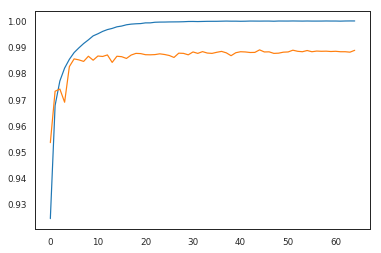

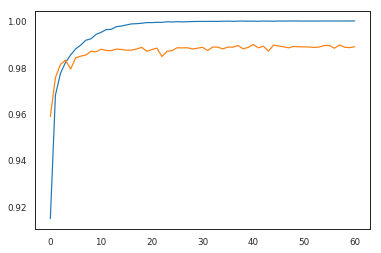

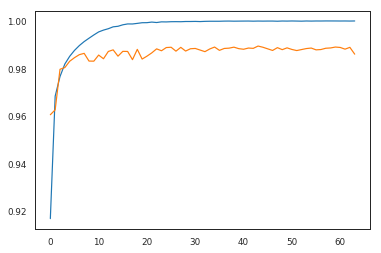

processed 12951 tokens with 774 phrases; found: 774 phrases; correct: 611.
accuracy:  81.69%; (non-O)
accuracy:  96.63%; precision:  78.94%; recall:  78.94%; FB1:  78.94
             DATE: precision:  73.44%; recall:  79.66%; FB1:  76.42  64
              LOC: precision:  82.17%; recall:  76.79%; FB1:  79.38  157
        MISC--AFF: precision:  91.76%; recall:  91.76%; FB1:  91.76  85
        MISC--ENT: precision:  50.00%; recall:  60.00%; FB1:  54.55  12
       MISC-EVENT: precision:  50.00%; recall:  80.00%; FB1:  61.54  8
            MONEY: precision:  93.55%; recall:  93.55%; FB1:  93.55  31
              ORG: precision:  67.92%; recall:  67.50%; FB1:  67.71  159
          PERCENT: precision:  96.15%; recall:  86.21%; FB1:  90.91  26
             PERS: precision:  80.26%; recall:  83.94%; FB1:  82.06  228
             TIME: precision:  50.00%; recall:  22.22%; FB1:  30.77  4
processed 12455 tokens with 778 phrases; found: 775 phrases; correct: 639.
accuracy:  84.46%; (non-O)
accurac

In [64]:
for conf in configs5:
    print (conf.keys())
    mh = [create_model(split, char, min_delta=0.0002, **conf) for split, char in zip(splits, splits_char)]
    hists = [h for m, h in mh]
    models = [m for m, h in mh]
    plot_histories(hists, **conf)
    all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, **conf)
    all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]
    res = []
    for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
        res.append(evaluate(cat_y_te, cat_preds))
    results5.append(res)
    

In [65]:
for c in configs5:
    if 'embedding_matrix' in c:
        c.update({'embedding_matrix': 'fastext'}) 

In [66]:
list(zip(configs5, results5))

[({'use_char': True,
   'crf': True,
   'use_pos': True,
   'embedding_matrix': 'fastext',
   'trainable': True,
   'embed_dim': 300},
  [(78.9405684754522, 78.9405684754522, 78.9405684754522),
   (82.45161290322581, 82.13367609254499, 82.29233741146167),
   (81.22448979591836, 76.14795918367348, 78.60434496379197)])]

In [68]:
import pickle
with open('morpheme_results_5.pkl', 'wb') as f:
    pickle.dump(list(zip(configs5, results5)), f)

In [69]:
configs_all = configs + configs2 + configs3 + configs4

In [70]:
len(configs_all)

20

In [71]:
configs_all = [c for c in configs_all if ('crf' in c) and not ('trainable' in c and not c['trainable']) ]

In [74]:
results_all = []

dict_keys(['crf', 'use_pos'])
Train on 2663 samples, validate on 296 samples
Epoch 1/100
2663/2663 [==============================] - 39s 15ms/step - loss: 0.4032 - crf_accuracy: 0.9063 - val_loss: 0.2399 - val_crf_accuracy: 0.9498
Epoch 2/100
2663/2663 [==============================] - 36s 14ms/step - loss: 0.1947 - crf_accuracy: 0.9565 - val_loss: 0.1917 - val_crf_accuracy: 0.9514
Epoch 3/100
2663/2663 [==============================] - 37s 14ms/step - loss: 0.1497 - crf_accuracy: 0.9581 - val_loss: 0.1518 - val_crf_accuracy: 0.9592
Epoch 4/100
2663/2663 [==============================] - 37s 14ms/step - loss: 0.1127 - crf_accuracy: 0.9660 - val_loss: 0.1266 - val_crf_accuracy: 0.9631
Epoch 5/100
2663/2663 [==============================] - 36s 14ms/step - loss: 0.0852 - crf_accuracy: 0.9731 - val_loss: 0.1117 - val_crf_accuracy: 0.9689
Epoch 6/100
2663/2663 [==============================] - 37s 14ms/step - loss: 0.0656 - crf_accuracy: 0.9793 - val_loss: 0.1135 - val_crf_accuracy: 

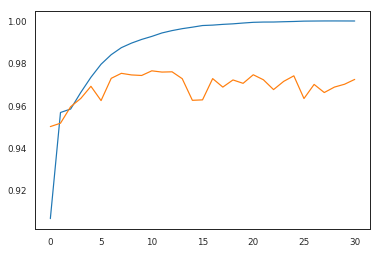

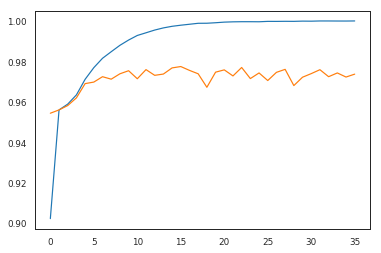

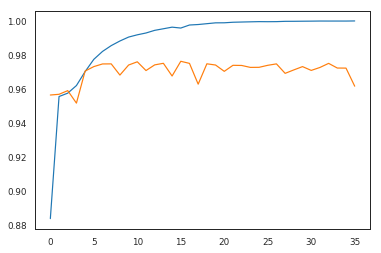

processed 12951 tokens with 774 phrases; found: 683 phrases; correct: 388.
accuracy:  64.44%; (non-O)
accuracy:  93.48%; precision:  56.81%; recall:  50.13%; FB1:  53.26
             DATE: precision:  44.68%; recall:  35.59%; FB1:  39.62  47
              LOC: precision:  63.87%; recall:  58.93%; FB1:  61.30  155
        MISC--AFF: precision:  61.46%; recall:  69.41%; FB1:  65.19  96
        MISC--ENT: precision:  10.00%; recall:  10.00%; FB1:  10.00  10
       MISC-EVENT: precision:  16.67%; recall:  20.00%; FB1:  18.18  6
            MONEY: precision:  71.43%; recall:  64.52%; FB1:  67.80  28
              ORG: precision:  48.09%; recall:  39.38%; FB1:  43.30  131
          PERCENT: precision:  43.48%; recall:  34.48%; FB1:  38.46  23
             PERS: precision:  60.96%; recall:  52.29%; FB1:  56.30  187
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
processed 12455 tokens with 778 phrases; found: 707 phrases; correct: 444.
accuracy:  67.03%; (non-O)
accurac

In [ ]:
for conf in configs_all:
    print (conf.keys())
    mh = [create_model(split, char, min_delta=0.0001, **conf) for split, char in zip(splits, splits_char)]
    hists = [h for m, h in mh]
    models = [m for m, h in mh]
    plot_histories(hists, **conf)
    all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, **conf)
    all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]
    res = []
    for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
        res.append(evaluate(cat_y_te, cat_preds))
    results_all.append(res)
    

In [79]:
for c in configs_all:
    if 'embedding_matrix' in c:
        c.update({'embedding_matrix': 'fastext'}) 

In [80]:
list(zip(configs_all, results_all))

[({'crf': True, 'use_pos': False},
  [(56.8081991215227, 50.129198966408275, 53.26012354152368),
   (62.800565770862804, 57.0694087403599, 59.79797979797979),
   (56.35036496350365, 49.234693877551024, 52.55275697753574)]),
 ({'crf': True, 'use_pos': True},
  [(64.03743315508021, 61.88630490956072, 62.94349540078844),
   (60.73232323232324, 61.82519280205655, 61.273885350318466),
   (59.0782122905028, 53.954081632653065, 56.39999999999999)]),
 ({'embed_dim': 300,
   'embedding_matrix': 'fastext',
   'crf': True,
   'use_pos': False},
  [(70.56694813027744, 75.5813953488372, 72.9881472239551),
   (73.11028500619578, 75.83547557840618, 74.44794952681389),
   (69.20199501246883, 70.79081632653062, 69.98738965952082)]),
 ({'embed_dim': 300,
   'embedding_matrix': 'fastext',
   'crf': True,
   'use_pos': True},
  [(73.0295566502463, 76.61498708010336, 74.77931904161413),
   (73.92373923739237, 77.24935732647815, 75.54996857322439),
   (74.24242424242425, 75.0, 74.61928934010153)]),
 ({'use_

In [81]:
import pickle
with open('morpheme_results_6.pkl', 'wb') as f:
    pickle.dump(list(zip(configs_all, results_all)), f)